In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/yellow_taxi_grafic.csv')

In [ ]:
df

,trip_distance,passenger_count,tip_amount,trip_distance_round,tip_amount_round
0,0.60,1,1.45,1.0,1.0
1,2.22,2,3.56,2.0,4.0
2,0.70,1,1.08,1.0,1.0
3,0.81,1,0.00,1.0,0.0
4,3.76,1,4.26,4.0,4.0
...,...,...,...,...,...
497760,26.36,1,14.56,26.0,15.0
497761,12.83,2,10.52,13.0,11.0
497762,6.01,6,1.00,6.0,1.0
497763,20.57,2,10.00,21.0,10.0


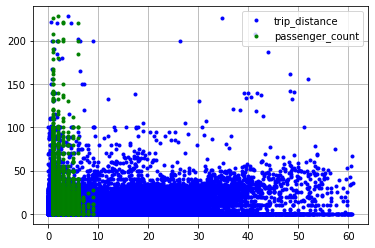

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['trip_distance'], df['tip_amount'],'b.', label="trip_distance")
ax.plot(df['passenger_count'], df['tip_amount'],'g.', label="passenger_count")
ax.legend()
ax.grid()
plt.show()

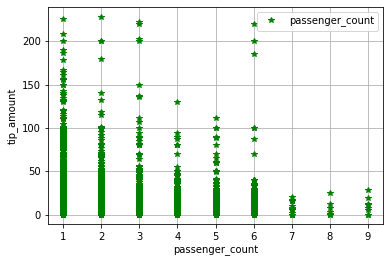

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['passenger_count'], df['tip_amount'],'g*', label="passenger_count")
ax.legend()
ax.grid()
ax.set_xlabel('passenger_count')
ax.set_ylabel('tip_amount')
plt.show()

График показывает, что с увеличением количества пассажиров, размер чаевых уменьшается.
 

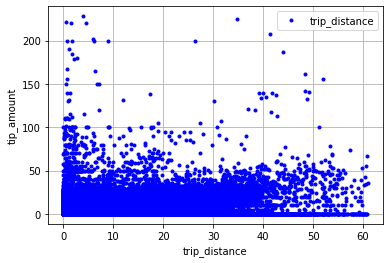

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['trip_distance'], df['tip_amount'],'b.', label="trip_distance")
ax.legend()
ax.grid()
ax.set_xlabel('trip_distance')
ax.set_ylabel('tip_amount')
plt.show()

График показывает, что с увеличением расстояния поездки, размер чаевых увеличивается, но не значительно, в общем количестве поездок.

In [ ]:
df.corr()

,trip_distance,passenger_count,tip_amount,trip_distance_round,tip_amount_round
trip_distance,1.000000,-0.177017,0.553021,0.999006,0.552093
passenger_count,-0.177017,1.000000,-0.182008,-0.176804,-0.182258
tip_amount,0.553021,-0.182008,1.000000,0.552400,0.998606
trip_distance_round,0.999006,-0.176804,0.552400,1.000000,0.551476
tip_amount_round,0.552093,-0.182258,0.998606,0.551476,1.000000


In [ ]:
dfm3 = df.groupby(["trip_distance_round"]).agg(
    tmean_tip_amount = pd.NamedAgg(column="tip_amount_round", aggfunc="mean"),
    tmedian_tip_amount = pd.NamedAgg(column="tip_amount_round",aggfunc="median"),
    tmin_tip_amount = pd.NamedAgg(column="tip_amount_round",aggfunc="min"),
    tmax_tip_amount = pd.NamedAgg(column="tip_amount_round",aggfunc="max"),
).reset_index()
dfm3

,trip_distance_round,tmean_tip_amount,tmedian_tip_amount,tmin_tip_amount,tmax_tip_amount
0,0.0,4.139623,2.0,0.0,111.0
1,1.0,2.491227,2.0,0.0,222.0
2,2.0,2.963866,3.0,0.0,220.0
3,3.0,3.538522,3.0,0.0,180.0
4,4.0,4.153092,4.0,0.0,228.0
...,...,...,...,...,...
57,57.0,19.714286,15.0,0.0,74.0
58,58.0,9.636364,0.0,0.0,39.0
59,59.0,6.214286,0.0,0.0,30.0
60,60.0,14.666667,0.0,0.0,53.0


In [ ]:
dfm4 = df.groupby(["passenger_count"]).agg(
    pmean_tip_amount = pd.NamedAgg(column="tip_amount_round", aggfunc="mean"),
    pmedian_tip_amount = pd.NamedAgg(column="tip_amount_round",aggfunc="median"),
    pmin_tip_amount = pd.NamedAgg(column="tip_amount_round",aggfunc="min"),
    pmax_tip_amount = pd.NamedAgg(column="tip_amount_round",aggfunc="max"),
).reset_index()
dfm4

,passenger_count,pmean_tip_amount,pmedian_tip_amount,pmin_tip_amount,pmax_tip_amount
0,1,6.671967,6.0,0.0,226.0
1,2,5.574531,5.0,0.0,228.0
2,3,4.651147,4.0,0.0,222.0
3,4,4.199575,3.0,0.0,130.0
4,5,4.427553,4.0,0.0,111.0
5,6,4.190033,3.0,0.0,220.0
6,7,7.117647,6.0,0.0,20.0
7,8,6.857143,3.0,0.0,24.0
8,9,10.250000,9.0,0.0,28.0


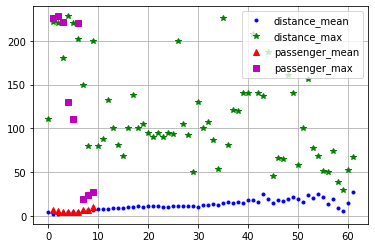

In [ ]:
fig, ax = plt.subplots()
ax.plot(dfm3['trip_distance_round'], dfm3['tmean_tip_amount'],'b.', label="distance_mean")
ax.plot(dfm3['trip_distance_round'], dfm3['tmax_tip_amount'],'g*', label="distance_max")
ax.plot(dfm4['passenger_count'], dfm4['pmean_tip_amount'],'r^', label="passenger_mean")
ax.plot(dfm4['passenger_count'], dfm4['pmax_tip_amount'],'ms', label="passenger_max")
ax.legend()
ax.grid()
plt.show()

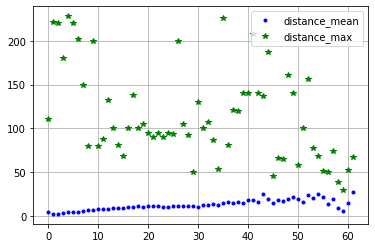

In [ ]:
fig, ax = plt.subplots()
ax.plot(dfm3['trip_distance_round'], dfm3['tmean_tip_amount'],'b.', label="distance_mean")
ax.plot(dfm3['trip_distance_round'], dfm3['tmax_tip_amount'],'g*', label="distance_max")
ax.legend()
ax.grid()
plt.show()

График показывает, что средний размер чаевых намного меньше максимального размера. При этом средний размер чаевых увеличивается с увеличением пройденного расстояния.

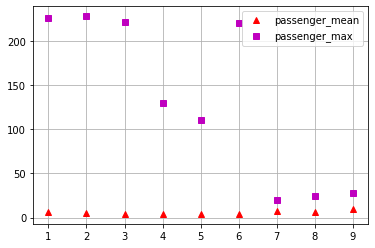

In [ ]:
fig, ax = plt.subplots()

ax.plot(dfm4['passenger_count'], dfm4['pmean_tip_amount'],'r^', label="passenger_mean")
ax.plot(dfm4['passenger_count'], dfm4['pmax_tip_amount'],'ms', label="passenger_max")
ax.legend(loc='upper right')
ax.grid()
plt.show()

График показывает незначительное увеличение размера чаевых в крайних точках количества пассажиров (7,8,9)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Mesh3d(x=df["passenger_count"],
                   y=df["trip_distance"],
                   z=df["tip_amount"],
                  opacity=0.5,
                  color='rgba(100,22,200,0.5)'
                  )])

fig.update_layout(scene = dict(
                    xaxis_title='X passenger_count',
                    yaxis_title='Y trip_distance',
                    zaxis_title='Z tip_amount'),                   
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

По графикам, можно сказать прямой пропорциальной зависимости между размером чаевых и пройденным расстоянием, количеством пассажиров НЕТ